# Using simulation to quickly evaluate job offers with statistics

Let’s suppose you are lucky enough to be considering various job offers. Well done! Give yourself a pat on the back.

But now, you attention turns to a new challenge; which job do you choose?

A primary challenge in making a decision is there is uncertainty. How can you know exactly what you will be doing at one company versus another? And for how long? Will you enjoy it? Let's face it, priorities change often and you may draw the short end of the stick.

The point here is that it's difficult to make an objective decision.

That’s where Monte Carlo simulation can play a handy role. In the simulation below, we'll have you subjectively weigh the importance of several variables that often affect the overall satisfaction of a job. When we're done with that, we'll run an experiment based on the information.

So don't be shy, step up and let's play ball!

What you need to do:
- Choose _which_ `variables` go into your decision-making (salary, conditions, location, work-life balance, etc.)
  - Note: drop obvious variables, like perhaps `travel` if there is no chance you'd have to travel for a job.
- Define the subjective `importance` of each variable has (out of 100).
- For each variable, define two importance numbers. One for the `minimum` that you expect and one for the `maximum` out of $[0, 10]$. For example, I may believe compensation for a job is between $[7, 10]$ inclusive because the stock component of the deal is potentially volatile.
  - For anybody actually reading this, for which I am skeptical, a grand improvement to this would be to be able to choose the distribution for which a variable comes from. Like a startup's stock may be completely worthless or make you an overnight millionaire eventually, so a simulation that fairly estimates that most startups fail like maybe an exponential distribution would generate more low numbers than high numbers here over the course of the say 10000 simulations.

What is perhaps most interesting with this approach to thinking about the various job offers is that it can help you realize bias you may subconsciously have about your various options. Indeed, by grading all the variables on their own, you might realize that an option firmly comes out on top!

In [16]:
# Import packages
import random
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def simulate(grades: list, variables: list, weights: list, iterations: int = 10000) -> list:
    """Simulates scores based on the weight of variables and randomly generated values within given grade ranges.

    :param grades: A list containing upper and lower estimations of specific variables.
    :param variables: A list containing the names of the variables that underpin job importance.
    :param iterations: An int indicating how many simulations to generate.

    :return: A list of summed scores for simulated values across all the inputted variables.
    """

    final_results = []  # Instantiate return object
    print(f"Sum of Weights (should be equal to 100): {sum(weights)}")

    for _ in range(iterations):
        results = [
            weights[i]/100 * random.uniform(grades[i][0], grades[i][1])
            for i in range(len(variables))
        ]
        final_results.append(sum(results))

    return final_results

# Define job variables and their corresponding grades
iterations = 10000
var_weights = {
    'compensation': 30,
    'day_to_day_work': 20,
    'career_advancement': 15,
    'location': 10,
    'social_impact': 5,
    'job_security':5,
    'conditions': 5,
    'culture': 5,
    'work_life_balance': 3,
    'travel': 2
}

job_grades = {
    'Job A': [[6, 9], [8.5, 10], [5, 9], [8.5, 9.5], [3, 7], [4, 9], [3, 8], [7.5, 8], [5, 9], [0, 6]],
    'Job B': [[5, 10], [4, 4], [7, 9], [2, 8], [6, 9.5], [8.5, 10], [8, 10], [0, 7], [3, 9], [0, 3]],
    'Job C': [[4, 7], [6, 8], [6, 9], [6.5, 9], [2, 6], [6.5, 9], [5.5, 9], [9.5, 9.5], [5, 9], [4, 9]],
}

# Simulate for each job and store results
job_results = {job: simulate(grades, list(var_weights.keys()), list(var_weights.values()), iterations) for job, grades in job_grades.items()}

Sum of Weights (should be equal to 100): 100
Sum of Weights (should be equal to 100): 100
Sum of Weights (should be equal to 100): 100


Summary Statistics for Job A:
 - Mean: 7.55
 - Median: 7.56
 - Standard Deviation: 0.35
 - Minimum: 6.42
 - Maximum: 8.67

Summary Statistics for Job B:
 - Mean: 6.45
 - Median: 6.45
 - Standard Deviation: 0.49
 - Minimum: 5.11
 - Maximum: 7.82

Summary Statistics for Job C:
 - Mean: 6.71
 - Median: 6.71
 - Standard Deviation: 0.33
 - Minimum: 5.70
 - Maximum: 7.79



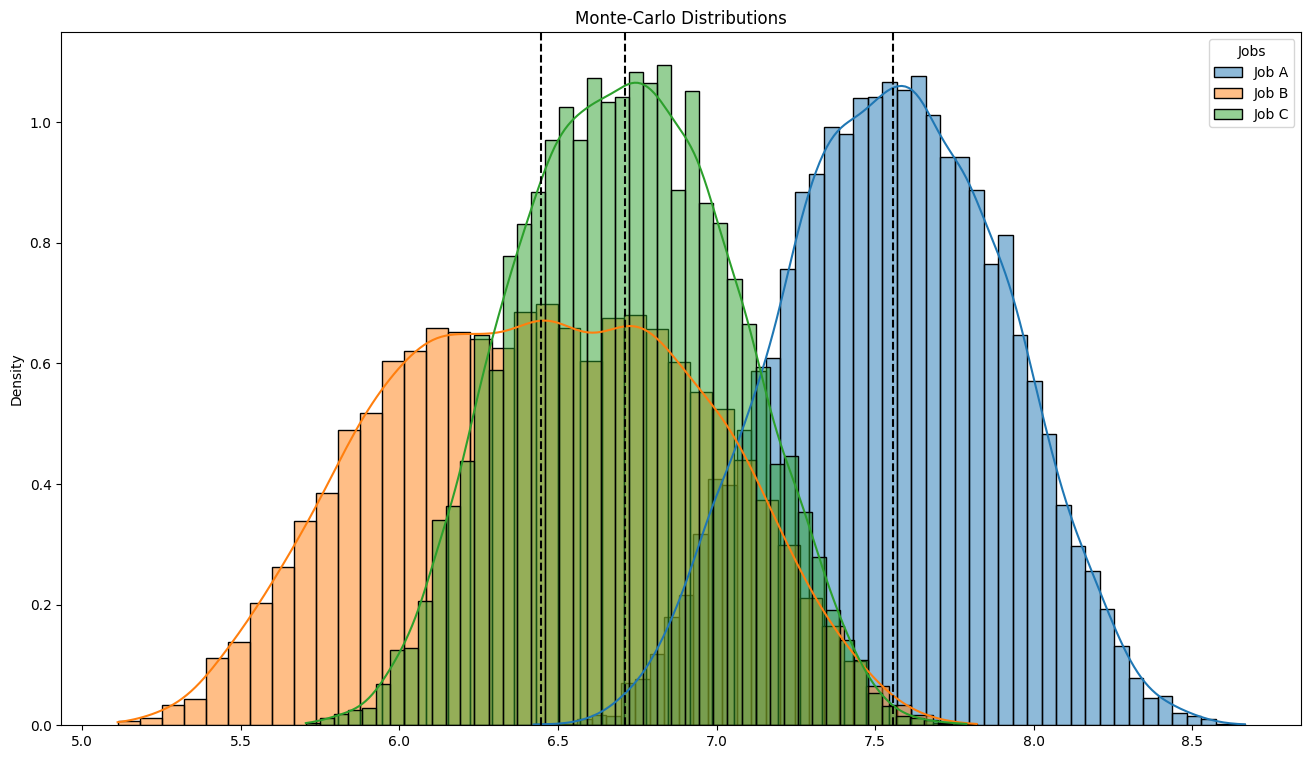

In [17]:

# Print summary statistics for each job
for job, results in job_results.items():
    mean = np.mean(results)
    median = np.median(results)
    std_dev = np.std(results)
    min_val = np.min(results)
    max_val = np.max(results)

    print(f"Summary Statistics for {job}:")
    print(f" - Mean: {mean:.2f}")
    print(f" - Median: {median:.2f}")
    print(f" - Standard Deviation: {std_dev:.2f}")
    print(f" - Minimum: {min_val:.2f}")
    print(f" - Maximum: {max_val:.2f}\n")

# Plot the results
plt.figure(figsize=(16, 9))
for job, results in job_results.items():
    sns.histplot(results, kde=True, stat='density', label=job, alpha=0.5)

# Add vertical lines for means
for job, results in job_results.items():
    plt.axvline(x=sum(results) / len(results), color='black', ls='--')

plt.title('Monte-Carlo Distributions')
plt.legend(title='Jobs')
plt.show()

There appears to be a favorite, job A, according to the center of the distribution. But note how much more largely spread job A is compared to job C. Without doing the math, it roughly looksi n of the simulations, Job A was not so much better than Job C.

The simulation has allowed us to compare the various options over multiple iterations to determine how risky those options really are. Now the job seeker can improve his or her assessment regarding whether the extra risk associated with an option is worth the reward.

In [ ]:
# import warnings
# warnings.filterwarnings('ignore')